<a href="https://colab.research.google.com/github/AlejandroAhogado/Proyecto1BI/blob/main/proyecto_1_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Importacion/Instalacion de librerias

In [ ]:
#Manejo de datos
import pandas as pd
import numpy as np
from tqdm import tqdm
import re, string, unicodedata

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Librerías para manejo de Lenguaje Natural
!pip install contractions --quiet
import contractions
from contractions import contractions_dict
!pip install inflect
import inflect
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

# NLTK
import nltk
nltk.download('all')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

#Entrenamiento del modelo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

from tqdm import tqdm
!pip install tensorflow
import tensorflow as tf
import torch

import csv

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package pil to
[nltk

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     C:\Users\jdscc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |    

In [ ]:
data = pd.read_csv('SuicidiosProyecto.csv',sep=',', encoding='utf-8', error_bad_lines=False)

C:\Users\jdscc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


# II. Exploramiento de datos

Se hace una exploracion inicial de los datos para ver en que formato estan presentados y que tipo de pre-proesamiento hay que hacer

In [ ]:
data.head(10)

,Unnamed: 0,text,class
0,173271,i want to destroy myselffor once everything wa...,suicide
1,336321,I kinda got behind schedule with learning for ...,non-suicide
2,256637,I'm just not sure anymoreFirst and foremost: I...,suicide
3,303772,please give me a reason to liveThats too much ...,suicide
4,293747,27f struggling to find meaning moving forwardI...,suicide
5,205651,Let’s get this bread 😎 Anyone know any good ba...,non-suicide
6,97174,"Day 126 of posting random ""fun"" facts everyday...",non-suicide
7,195945,Little brother is self mutilating. Please help...,suicide
8,305273,Why do women always go in groups to their wash...,non-suicide
9,69929,Did you guys know that there's no school for g...,non-suicide


# III. Preprocesamiento de Datos

## 3.1 Transformacion columna objetivo

Inicialmente se cambia la columna objetivo a un valor binario 0/1 que corresponde a las categorias de non-suicide/suicide respectivamente. Tambien se elimina la columna "unnamed:0" pues esta corresponde a un identificador unico que no es relevante para la tarea propuesta

In [ ]:
df=data.copy()
df=df.drop(df.columns[0], axis=1)
df['class'].replace(('suicide'), ('1'), inplace=True)
df['class'].replace(('non-suicide'), ('0'), inplace=True)
df['class'] = pd.to_numeric(df['class'])
df

,text,class
0,i want to destroy myselffor once everything wa...,1
1,I kinda got behind schedule with learning for ...,0
2,I'm just not sure anymoreFirst and foremost: I...,1
3,please give me a reason to liveThats too much ...,1
4,27f struggling to find meaning moving forwardI...,1
...,...,...
195695,Drop some cool new cereal ideas Like what woul...,0
195696,Unpopular opinion but cats deserve love and re...,0
195697,Hey guys :) How yall doin?,0
195698,uhm I covered my dog in a blanket because the ...,0


Ademas se valida el contenido de la columna 'class' para verificar que no haya ninguna inconsistencia con los labels

In [ ]:
df['class'].value_counts()

0    110165
1     85535
Name: class, dtype: int64

Tambien se valida la validez y completitud de los datos verificando que no hallan nulos o duplicados y eliminando las filas correspondientes en caso que se encuentren

In [ ]:
df.duplicated().value_counts()

False    195700
dtype: int64

In [ ]:
data.isna().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

Por ultimo se verifica que las columnas tengan el tipo de dato apropiado para su procesamiento

In [ ]:
df.dtypes

text     object
class     int64
dtype: object

## 3.2 Preparacion de datos
Todos los pasos contenidos en esta seccion corresponden a la limpieza y pre proceamiento del texto en la columna 'text' para poder dejarlo en un formato apto para su posterior evaluacion con modelos de PLN. Inicialmente se separan los datos en texto y labels para poder realizar ls tareas de limpieza solo sobre los datos de texto que lo requieren



In [ ]:
_, data_small = train_test_split(df, test_size=0.20, random_state=42)

In [ ]:
train, test = train_test_split(data_small, test_size=0.2, random_state=42)
X_train, y_train = train['text'], train['class']
X_test, y_test = test['text'], test['class']
print("Tamaño del conjunto de entrenamiento: "+str(X_train.size))
print("Tamaño del conjunto de evaluación: "+str(X_test.size))

Tamaño del conjunto de entrenamiento: 31312
Tamaño del conjunto de evaluación: 7828


### 3.2.1 Eliminacion contracciones

Eliminar contracciones permite reducir el tamaño del diccionario y evita que se tomen como palabras distintas casos como, por ejemplo, won't = will not. I'm = I am

In [ ]:
X_clean= X_train.apply(contractions.fix) #Aplica la corrección de las contracciones
X_clean_test= X_test.apply(contractions.fix) #Aplica la corrección de las contracciones
X_clean

170783    I really hate my life.I am 13 years old and I ...
60450     I Am ending it tonightim leaving so many frien...
159181    Yo anyone down to chat? I am 14M, very emo, an...
63934     Someone knocked Is not it fun that one of my p...
90090     I do not know what to do and I am scared that ...
                                ...                        
161943                   i am uselesshaving a panic attack.
188694    I feel like ending it would feel better than s...
20015     Sometimes I just feel like I cannot do this an...
141904    i have lost the will to live anymore,i am goin...
127158    The release of the new Netflix film is the dra...
Name: text, Length: 31312, dtype: object

### 3.2.2 Minusculas

In [ ]:
def to_lowercase(phrase):
    new_phrase = []
    for word in phrase:
        new_word = word.lower()
        new_phrase.append(new_word)
    return "".join(new_phrase)

In [ ]:
X_clean=X_clean.apply(to_lowercase)
X_clean_test=X_clean_test.apply(to_lowercase)
X_clean

170783    i really hate my life.i am 13 years old and i ...
60450     i am ending it tonightim leaving so many frien...
159181    yo anyone down to chat? i am 14m, very emo, an...
63934     someone knocked is not it fun that one of my p...
90090     i do not know what to do and i am scared that ...
                                ...                        
161943                   i am uselesshaving a panic attack.
188694    i feel like ending it would feel better than s...
20015     sometimes i just feel like i cannot do this an...
141904    i have lost the will to live anymore,i am goin...
127158    the release of the new netflix film is the dra...
Name: text, Length: 31312, dtype: object

### 3.2.3 puntuacion

In [ ]:
def remove_punctuation(phrase):
    return phrase.translate(str.maketrans('','',string.punctuation))

In [ ]:
X_clean=X_clean.apply(remove_punctuation)
X_clean_test=X_clean_test.apply(remove_punctuation)
X_clean

170783    i really hate my lifei am 13 years old and i r...
60450     i am ending it tonightim leaving so many frien...
159181    yo anyone down to chat i am 14m very emo and i...
63934     someone knocked is not it fun that one of my p...
90090     i do not know what to do and i am scared that ...
                                ...                        
161943                    i am uselesshaving a panic attack
188694    i feel like ending it would feel better than s...
20015     sometimes i just feel like i cannot do this an...
141904    i have lost the will to live anymorei am going...
127158    the release of the new netflix film is the dra...
Name: text, Length: 31312, dtype: object

### 3.2.4 Remover stopwords

In [ ]:
def remove_stopwords(phrase, stopwords=stopwords.words('english')):
    words=phrase.split(" ")
    new_phrase = []
    for word in words:
        if word not in stopwords:
            new_phrase.append(word)
            new_phrase.append(" ")
    return "".join(new_phrase)[:-1]

In [ ]:
X_clean=X_clean.apply(remove_stopwords)
X_clean_test=X_clean_test.apply(remove_stopwords)
X_clean

170783    really hate lifei 13 years old really hate lif...
60450     ending tonightim leaving many friends pets gir...
159181    yo anyone chat 14m emo spotify addict longest ...
63934     someone knocked fun one parents knocked door e...
90090     know scared screw something bestie f really cl...
                                ...                        
161943                           uselesshaving panic attack
188694    feel like ending would feel better suffering d...
20015     sometimes feel like cannot anymoremaybe partia...
141904    lost live anymorei going kill 2 hour 15 mintue...
127158    release new netflix film drama september liter...
Name: text, Length: 31312, dtype: object

## 3.3  Tokenizacion

In [ ]:
X_clean = X_clean.apply(word_tokenize)
X_clean_test = X_clean_test.apply(word_tokenize)
X_clean.head()

170783    [really, hate, lifei, 13, years, old, really, ...
60450     [ending, tonightim, leaving, many, friends, pe...
159181    [yo, anyone, chat, 14m, emo, spotify, addict, ...
63934     [someone, knocked, fun, one, parents, knocked,...
90090     [know, scared, screw, something, bestie, f, re...
Name: text, dtype: object

## 3.4 Lematizacion/Stemming

In [ ]:
# Funciones tomadas de https://www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = lemmatize_verbs(words)
    words = stem_words(words)
    return words

In [ ]:
%%time
X_clean = X_clean.apply(stem_and_lemmatize) 
X_clean_test = X_clean_test.apply(stem_and_lemmatize)
X_clean.head()

Wall time: 31.4 s


170783    [real, hat, life, 13, year, old, real, hat, li...
60450     [end, tonightim, leav, many, friend, pet, girl...
159181    [yo, anyon, chat, 14m, emo, spot, addict, long...
63934     [someon, knock, fun, on, par, knock, door, eve...
90090     [know, scar, screw, someth, besty, f, real, cl...
Name: text, dtype: object

# IV. Implementacion de modelos

## Representacion vectorial de datos

Dado que es necesario realizar una representacion vectorial del texto para su posterior procesamiento se seleccionan 3 tipos de representacion diferentes, para cada modelo se van a utilizar las 3 representaciones vectoriales para poder seleccionar el mejor resultado posible 


*   Matriz de Frecuencia
*   Representacion termino documento (TFIDF)
*   Matriz binaria

Inicialmente se combinan todos los tokens que componen cada sentencia en un string para poder crear representaciones matriciales 

In [ ]:
X_clean = X_clean.apply(lambda x: ' '.join(map(str, x)))
X_clean_test = X_clean_test.apply(lambda x: ' '.join(map(str, x)))
X_clean.head(3)

170783      real hat life 13 year old real hat lif want die
60450     end tonightim leav many friend pet girlfriend ...
159181    yo anyon chat 14m emo spot addict longest play...
Name: text, dtype: object

### Matriz frecuencia

In [ ]:
# También, se puede realizar el conteo de las palabras presentes.
count = CountVectorizer()
X_count = count.fit_transform(X_clean)
print(X_count.shape)

(31312, 40792)


In [ ]:
X_count_test=count.transform(X_clean_test)
print(X_count_test.shape)

(7828, 40792)


### tfidf

In [ ]:
#Se puede realizar la transformación Term-frecuency times inverse Document-frecuency.
tf_idf = TfidfVectorizer()
X_tf_idf = tf_idf.fit_transform(X_clean)
print(X_tf_idf.shape)

(31312, 40792)


In [ ]:
X_TfIdf_test=tf_idf.transform(X_clean_test)
print(X_TfIdf_test.shape)

(7828, 40792)


### Binaria

In [ ]:
# Se transforma el texto con una transformación binaria 1 a 1.
binary = CountVectorizer(binary=True, lowercase = False)
X_binary = binary.fit_transform(X_clean)
print(X_binary.shape)

(31312, 40792)


In [ ]:
X_binary_test=binary.transform(X_clean_test)
print(X_binary_test.shape)

(7828, 40792)


In [ ]:
train_datasets={"binary":X_binary,
                "count":X_count,
                "tfidf":X_tf_idf}
test_datasets={"binary":X_binary_test,
                "count":X_count_test,
                "tfidf":X_TfIdf_test}

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
print(X_binary.shape)

(31312, 40792)


In [ ]:
print(y_train.shape)

(31312,)


## 4.1 Algoritmo 1: Arbol de decision

In [ ]:
estimators = [
        ('classifier', DecisionTreeClassifier(random_state=0))          
    ]

parameters = {
              'classifier__criterion':['gini','entropy'],
              'classifier__max_depth':[30,40,50,60,70],
            }

pipe_tree = Pipeline(estimators)

In [ ]:
%%time
best_trees={}
for key in train_datasets:
  grid_search_tree = GridSearchCV(pipe_tree, parameters, scoring='f1', cv=3, verbose=3)
  with tf.device('/device:GPU:0'):
    grid_search_tree.fit(train_datasets[key],y_train)
    best_trees[key]=grid_search_tree.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=30;, score=0.816 total time=   3.8s
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=30;, score=0.829 total time=   3.6s
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=30;, score=0.829 total time=   3.7s
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=40;, score=0.811 total time=   4.2s
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=40;, score=0.827 total time=   4.1s
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=40;, score=0.824 total time=   4.2s
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=50;, score=0.810 total time=   4.5s
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=50;, score=0.823 total time=   4.5s
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=50;, score=0.826 total time=   4.4s
[CV 1/3] END classifier__criterion=gini, classif

[CV 3/3] END classifier__criterion=entropy, classifier__max_depth=40;, score=0.817 total time=   4.8s
[CV 1/3] END classifier__criterion=entropy, classifier__max_depth=50;, score=0.803 total time=   5.2s
[CV 2/3] END classifier__criterion=entropy, classifier__max_depth=50;, score=0.804 total time=   5.1s
[CV 3/3] END classifier__criterion=entropy, classifier__max_depth=50;, score=0.809 total time=   5.0s
[CV 1/3] END classifier__criterion=entropy, classifier__max_depth=60;, score=0.805 total time=   5.3s
[CV 2/3] END classifier__criterion=entropy, classifier__max_depth=60;, score=0.805 total time=   5.2s
[CV 3/3] END classifier__criterion=entropy, classifier__max_depth=60;, score=0.811 total time=   5.2s
[CV 1/3] END classifier__criterion=entropy, classifier__max_depth=70;, score=0.801 total time=   5.4s
[CV 2/3] END classifier__criterion=entropy, classifier__max_depth=70;, score=0.802 total time=   5.3s
[CV 3/3] END classifier__criterion=entropy, classifier__max_depth=70;, score=0.809

In [ ]:
print(y_test.shape)

(7828,)


In [ ]:
model=best_trees[key]['classifier']
y_pred=model.predict(test_datasets[key])

In [ ]:
print(y_pred.shape)

(7828,)


In [ ]:
tree_results={}
for key in best_trees:
  model=best_trees[key]['classifier']
  y_pred=model.predict(test_datasets[key])
  acc=accuracy_score(y_true=y_test, y_pred=y_pred)
  prec=precision_score(y_true=y_test, y_pred=y_pred)
  recall=recall_score(y_true=y_test, y_pred=y_pred)
  f1=f1_score(y_true=y_test, y_pred=y_pred)
  tree_results[key]=[best_trees[key]['classifier'], acc, prec, recall, f1]

In [ ]:
df_results=pd.DataFrame.from_dict(tree_results, orient='index')
mapping = {df_results.columns[1]: 'Accuracy', df_results.columns[2]: 'Precision', df_results.columns[3]: 'Recall', df_results.columns[4]: 'F1', df_results.columns[0]: 'Tree type'}
df_results = df_results.rename(columns=mapping)
df_results

,Tree type,Accuracy,Precision,Recall,F1
binary,"DecisionTreeClassifier(max_depth=30, random_st...",0.856541,0.859660,0.801408,0.829513
count,"DecisionTreeClassifier(max_depth=30, random_st...",0.858201,0.864111,0.800235,0.830947
tfidf,"DecisionTreeClassifier(max_depth=30, random_st...",0.855391,0.857233,0.801408,0.828381


In [ ]:
tree_results

{'binary': [DecisionTreeClassifier(max_depth=30, random_state=0),
  0.8565406234031682,
  0.8596601636249214,
  0.801408037547668,
  0.8295126764839836],
 'count': [DecisionTreeClassifier(max_depth=30, random_state=0),
  0.8582013285641288,
  0.8641114982578397,
  0.8002346729246114,
  0.8309473042948524],
 'tfidf': [DecisionTreeClassifier(max_depth=30, random_state=0),
  0.85539090444558,
  0.8572325070599309,
  0.801408037547668,
  0.8283808368708308]}

## 4.2 Algoritmo 2: KNN


In [ ]:
estimators = [
        ('classifier', KNeighborsClassifier())          
    ]

parameters = {
              'classifier__weights':['uniform','distance'],
              'classifier__n_neighbors':[5,6,7,8,9,10,11,12],
              'classifier__p':[1,2],
            }

pipe_knn = Pipeline(estimators)

In [ ]:
%%time
best_knn={}
for key in train_datasets:
  grid_search_knn = GridSearchCV(pipe_knn, parameters, scoring='f1', cv=3, verbose=3)
  with tf.device('/device:GPU:0'):
    grid_search_knn.fit(train_datasets[key],y_train)
    best_knn[key]=grid_search_knn.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END classifier__n_neighbors=5, classifier__p=1, classifier__weights=uniform;, score=0.620 total time=   8.1s
[CV 2/3] END classifier__n_neighbors=5, classifier__p=1, classifier__weights=uniform;, score=0.644 total time=   7.0s
[CV 3/3] END classifier__n_neighbors=5, classifier__p=1, classifier__weights=uniform;, score=0.648 total time=   7.8s
[CV 1/3] END classifier__n_neighbors=5, classifier__p=1, classifier__weights=distance;, score=0.620 total time=   7.9s
[CV 2/3] END classifier__n_neighbors=5, classifier__p=1, classifier__weights=distance;, score=0.645 total time=   6.9s
[CV 3/3] END classifier__n_neighbors=5, classifier__p=1, classifier__weights=distance;, score=0.648 total time=   7.6s
[CV 1/3] END classifier__n_neighbors=5, classifier__p=2, classifier__weights=uniform;, score=0.620 total time=   7.7s
[CV 2/3] END classifier__n_neighbors=5, classifier__p=2, classifier__weights=uniform;, score=0.644 total time=

[CV 1/3] END classifier__n_neighbors=10, classifier__p=2, classifier__weights=distance;, score=0.596 total time=   7.9s
[CV 2/3] END classifier__n_neighbors=10, classifier__p=2, classifier__weights=distance;, score=0.621 total time=   6.7s
[CV 3/3] END classifier__n_neighbors=10, classifier__p=2, classifier__weights=distance;, score=0.631 total time=   7.4s
[CV 1/3] END classifier__n_neighbors=11, classifier__p=1, classifier__weights=uniform;, score=0.571 total time=   8.1s
[CV 2/3] END classifier__n_neighbors=11, classifier__p=1, classifier__weights=uniform;, score=0.606 total time=   7.1s
[CV 3/3] END classifier__n_neighbors=11, classifier__p=1, classifier__weights=uniform;, score=0.615 total time=   7.7s
[CV 1/3] END classifier__n_neighbors=11, classifier__p=1, classifier__weights=distance;, score=0.571 total time=   7.9s
[CV 2/3] END classifier__n_neighbors=11, classifier__p=1, classifier__weights=distance;, score=0.607 total time=   6.8s
[CV 3/3] END classifier__n_neighbors=11, cl

[CV 1/3] END classifier__n_neighbors=8, classifier__p=2, classifier__weights=uniform;, score=0.663 total time=   8.0s
[CV 2/3] END classifier__n_neighbors=8, classifier__p=2, classifier__weights=uniform;, score=0.669 total time=   7.3s
[CV 3/3] END classifier__n_neighbors=8, classifier__p=2, classifier__weights=uniform;, score=0.673 total time=   7.7s
[CV 1/3] END classifier__n_neighbors=8, classifier__p=2, classifier__weights=distance;, score=0.708 total time=   7.7s
[CV 2/3] END classifier__n_neighbors=8, classifier__p=2, classifier__weights=distance;, score=0.713 total time=   7.1s
[CV 3/3] END classifier__n_neighbors=8, classifier__p=2, classifier__weights=distance;, score=0.715 total time=   7.4s
[CV 1/3] END classifier__n_neighbors=9, classifier__p=1, classifier__weights=uniform;, score=0.585 total time=   8.0s
[CV 2/3] END classifier__n_neighbors=9, classifier__p=1, classifier__weights=uniform;, score=0.619 total time=   7.2s
[CV 3/3] END classifier__n_neighbors=9, classifier__p

[CV 1/3] END classifier__n_neighbors=6, classifier__p=1, classifier__weights=distance;, score=0.002 total time=   7.9s
[CV 2/3] END classifier__n_neighbors=6, classifier__p=1, classifier__weights=distance;, score=0.004 total time=   6.9s
[CV 3/3] END classifier__n_neighbors=6, classifier__p=1, classifier__weights=distance;, score=0.003 total time=   7.6s
[CV 1/3] END classifier__n_neighbors=6, classifier__p=2, classifier__weights=uniform;, score=0.006 total time=   7.5s
[CV 2/3] END classifier__n_neighbors=6, classifier__p=2, classifier__weights=uniform;, score=0.007 total time=   8.1s
[CV 3/3] END classifier__n_neighbors=6, classifier__p=2, classifier__weights=uniform;, score=0.007 total time=   8.1s
[CV 1/3] END classifier__n_neighbors=6, classifier__p=2, classifier__weights=distance;, score=0.012 total time=   7.3s
[CV 2/3] END classifier__n_neighbors=6, classifier__p=2, classifier__weights=distance;, score=0.013 total time=   7.9s
[CV 3/3] END classifier__n_neighbors=6, classifier_

[CV 1/3] END classifier__n_neighbors=12, classifier__p=1, classifier__weights=uniform;, score=0.000 total time=   8.0s
[CV 2/3] END classifier__n_neighbors=12, classifier__p=1, classifier__weights=uniform;, score=0.000 total time=   7.2s
[CV 3/3] END classifier__n_neighbors=12, classifier__p=1, classifier__weights=uniform;, score=0.033 total time=   7.8s
[CV 1/3] END classifier__n_neighbors=12, classifier__p=1, classifier__weights=distance;, score=0.001 total time=   7.9s
[CV 2/3] END classifier__n_neighbors=12, classifier__p=1, classifier__weights=distance;, score=0.001 total time=   6.9s
[CV 3/3] END classifier__n_neighbors=12, classifier__p=1, classifier__weights=distance;, score=0.035 total time=   8.0s
[CV 1/3] END classifier__n_neighbors=12, classifier__p=2, classifier__weights=uniform;, score=0.003 total time=   7.5s
[CV 2/3] END classifier__n_neighbors=12, classifier__p=2, classifier__weights=uniform;, score=0.002 total time=   8.0s
[CV 3/3] END classifier__n_neighbors=12, clas

In [ ]:
knn_results={}
for key in best_knn:
  model=best_knn[key]['classifier']
  y_pred=model.predict(test_datasets[key])
  acc=accuracy_score(y_true=y_test, y_pred=y_pred)
  prec=precision_score(y_true=y_test, y_pred=y_pred)
  recall=recall_score(y_true=y_test, y_pred=y_pred)
  f1=f1_score(y_true=y_test, y_pred=y_pred)
  knn_results[key]=[best_knn[key]['classifier'], acc, prec, recall, f1]

In [ ]:
df_results=pd.DataFrame.from_dict(knn_results, orient='index')
mapping = {df_results.columns[1]: 'Accuracy', df_results.columns[2]: 'Precision', df_results.columns[3]: 'Recall', df_results.columns[4]: 'F1', df_results.columns[0]: 'Tree type'}
df_results = df_results.rename(columns=mapping)
df_results

,Tree type,Accuracy,Precision,Recall,F1
binary,"KNeighborsClassifier(p=1, weights='distance')",0.763158,0.893671,0.517747,0.655646
count,KNeighborsClassifier(weights='distance'),0.799821,0.872573,0.632737,0.733549
tfidf,KNeighborsClassifier(n_neighbors=11),0.566045,0.833333,0.004400,0.008754


## 4.3 Algoritmo 3: SVM

In [ ]:
estimators = [
        ('classifier', SVC(C=1,gamma="scale", kernel="rbf" ))          
    ]

parameters = {
              'classifier__C':[0.1, 1],
              'classifier__gamma':['scale', 'auto'],
              'classifier__kernel':['linear','rbf'],
            }

pipe_svm = Pipeline(estimators)

In [ ]:
%%time
best_svm={}
for key in train_datasets:
  grid_search_svm = GridSearchCV(pipe_svm, parameters, scoring='f1', cv=3, verbose=3)
  with tf.device('/device:GPU:0'):
    grid_search_svm.fit(train_datasets[key],y_train)
    best_svm[key]=grid_search_svm.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear;, score=0.895 total time=  41.0s
[CV 2/3] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear;, score=0.902 total time=  40.2s
[CV 3/3] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear;, score=0.896 total time=  40.5s
[CV 1/3] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf;, score=0.844 total time= 1.4min
[CV 2/3] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf;, score=0.851 total time= 1.4min
[CV 3/3] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf;, score=0.847 total time= 1.4min
[CV 1/3] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear;, score=0.895 total time=  41.1s
[CV 2/3] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear;, score=0.902 total time=  40.4s
[CV 3/3] END classifier

[CV 3/3] END classifier__C=1, classifier__gamma=auto, classifier__kernel=rbf;, score=0.000 total time= 2.3min
Wall time: 1h 58min 8s


In [ ]:
svm_results={}
for key in best_svm:
  model=best_svm[key]['classifier']
  y_pred=model.predict(test_datasets[key])
  acc=accuracy_score(y_true=y_test, y_pred=y_pred)
  prec=precision_score(y_true=y_test, y_pred=y_pred)
  recall=recall_score(y_true=y_test, y_pred=y_pred)
  f1=f1_score(y_true=y_test, y_pred=y_pred)
  svm_results[key]=[best_svm[key]['classifier'], acc, prec, recall, f1]

In [ ]:
df_results=pd.DataFrame.from_dict(svm_results, orient='index')
mapping = {df_results.columns[1]: 'Accuracy', df_results.columns[2]: 'Precision', df_results.columns[3]: 'Recall', df_results.columns[4]: 'F1', df_results.columns[0]: 'Tree type'}
df_results = df_results.rename(columns=mapping)
df_results

,Tree type,Accuracy,Precision,Recall,F1
binary,"SVC(C=0.1, kernel='linear')",0.920797,0.936190,0.877970,0.906146
count,"SVC(C=0.1, kernel='linear')",0.918881,0.941158,0.867996,0.903098
tfidf,"SVC(C=1, kernel='linear')",0.923863,0.925825,0.897037,0.911204


# V. Seleccion del mejor modelo

In [ ]:
##notese que aqui se esta utilizando el df completo y no el fragmento 'data small' utilizado para la seleccion del modelo
train, test = train_test_split(df, test_size=0.2, random_state=42)

##aca se redefine ytrain y ytest
X_full, y_train = train['text'], train['class']
X_full_test, y_test = test['text'], test['class']
X_full=X_full.apply(to_lowercase)
X_full_test=X_full_test.apply(to_lowercase)
X_full=X_full.apply(remove_punctuation)
X_full_test=X_full_test.apply(remove_punctuation)
X_full=X_full.apply(remove_stopwords)
X_full_test=X_full_test.apply(remove_stopwords)
X_full = X_full.apply(word_tokenize)
X_full_test = X_full_test.apply(word_tokenize)
X_full = X_full.apply(stem_and_lemmatize) 
X_full_test = X_full_test.apply(stem_and_lemmatize)

In [ ]:
X_full.sample(4)

23821     [cal, suicid, hotlin, night, immens, help, wan...
26059     [easiest, way, commit, suicide, don, ’, t, wan...
118324    [hap, button, hap, button, could, join, group,...
173322    [day, 4, tel, dream, bc, dream, crazy, stuff, ...
Name: text, dtype: object

In [ ]:
#Se puede realizar la transformación Term-frecuency times inverse Document-frecuency.
X_full = X_full.apply(lambda x: ' '.join(map(str, x)))
X_full_test = X_full_test.apply(lambda x: ' '.join(map(str, x)))
tf_idf = TfidfVectorizer()
X_tf_idf = tf_idf.fit_transform(X_full)
print(X_tf_idf.shape)

(156560, 125863)


In [ ]:
X_TfIdf_test=tf_idf.transform(X_full_test)
print(X_TfIdf_test.shape)

(39140, 125863)


In [ ]:
train_datasets={"tfidf":X_tf_idf}
test_datasets={"tfidf":X_TfIdf_test}

# VI. Evaluacion de resultados

## 6.1 metricas sobre set de test

In [ ]:
best_svm_model = SVC(C=1, kernel='linear', gamma='scale')
best_svm_model.fit(X_tf_idf, y_train)
y_pred_svm=best_svm_model.predict(X_TfIdf_test)


report_svm = classification_report(y_test, y_pred_svm)
print("SVM - Test\n", report_svm)

SVM - Test
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     22069
           1       0.93      0.92      0.92     17071

    accuracy                           0.93     39140
   macro avg       0.93      0.93      0.93     39140
weighted avg       0.93      0.93      0.93     39140



Confusion matrix, without normalization


<AxesSubplot:title={'center':'SVM - Test data set'}, xlabel='Predicted label', ylabel='True label'>

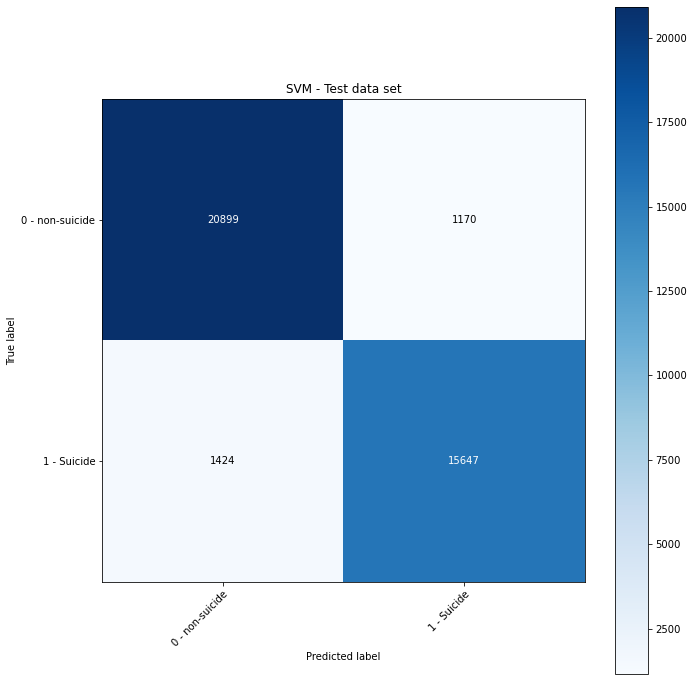

In [ ]:
%matplotlib inline
plot_confusion_matrix(y_true=y_test, y_pred=y_pred_svm, classes=["0 - non-suicide","1 - Suicide"],
                      title='SVM - Test data set')

## 6.2 creacion de labels

In [ ]:
data_unlabeled = pd.read_csv('SuicidiosProyectoSinEtiqueta.csv',sep=',', encoding='utf-8')

In [ ]:
data_unlabeled=data_unlabeled.drop(data_unlabeled.columns[0], axis=1)

In [ ]:
data_unlabeled

,text
0,"Suicide Thoughts Getting StrongerOK, since the..."
1,"Guys, I just asked my crush... if she wanted t..."
2,I'm going to kill myselfOf course I'm not but ...
3,I did it! I slept facing the wall.\n\nOverall ...
4,I don't want to be dead...I want to be alive a...
...,...
10295,Last thing Brutus said to Julius Caesar after ...
10296,I’m ready to end my life right now.I just turn...
10297,Notice it’s the attractive girls that get preg...
10298,SighIt just get harder and harder to find new ...


Se hace el procesamiento de texto para la nueva data entrante

In [ ]:
X_unlabeled = data_unlabeled['text']

In [ ]:
X_unlabeled= X_unlabeled.apply(contractions.fix) 
X_unlabeled = X_unlabeled.apply(to_lowercase)
X_unlabeled = X_unlabeled.apply(remove_punctuation)
X_unlabeled = X_unlabeled.apply(remove_stopwords)
X_unlabeled = X_unlabeled.apply(word_tokenize)
X_unlabeled = X_unlabeled.apply(stem_and_lemmatize) 

In [ ]:
X_unlabeled = X_unlabeled.apply(lambda x: ' '.join(map(str, x)))

In [ ]:
X_TfIdf_new=tf_idf.transform(X_unlabeled)

In [ ]:
new_y_labels=best_svm_model.predict(X_TfIdf_new)

Se verifica que la dimensionalidad de los labels coincida con los datos de entrada

In [ ]:
new_y_labels.shape

(10300,)

In [ ]:
data_unlabeled['class']=pd.Series(new_y_labels)

In [ ]:
data_unlabeled.dtypes

text     object
class     int64
dtype: object

In [ ]:
data_unlabeled['class'].replace((1), ('suicide'), inplace=True)
data_unlabeled['class'].replace((0), ('non-suicide'), inplace=True)
data_unlabeled

,text,class
0,"Suicide Thoughts Getting StrongerOK, since the...",suicide
1,"Guys, I just asked my crush... if she wanted t...",non-suicide
2,I'm going to kill myselfOf course I'm not but ...,suicide
3,I did it! I slept facing the wall.\n\nOverall ...,non-suicide
4,I don't want to be dead...I want to be alive a...,suicide
...,...,...
10295,Last thing Brutus said to Julius Caesar after ...,non-suicide
10296,I’m ready to end my life right now.I just turn...,suicide
10297,Notice it’s the attractive girls that get preg...,non-suicide
10298,SighIt just get harder and harder to find new ...,suicide


Se exporta el resultado a un CSV

In [ ]:
data_unlabeled.to_csv (r'Resultados_suicidio.csv', index = False, header=True)

Se exportan los modelos resultantes

In [ ]:
from joblib import dump, load
dump(best_svm_model, 'SVM_suicidio_proy1.joblib') 

['SVM_suicidio_proy1.joblib']